In [0]:
import sys
basePath='/Workspace/Users/bill.curry@exxonmobil.com'
gistPath='/Workspace/Users/bill.curry@exxonmobil.com/gist'
sys.path.append(basePath)
import numpy as np
import pandas as pd
import os
import gistMC as gi

#Fault Slip Potential reference
Density               = 1000    kg/m^3

Dynamic Viscosity     = 0.0008   Pa.s

Fluid Compressibility = 3.6e-10  Pa^-1

Rock Compressibility  = 1.08e-09 Pa^-1

Aquifer Thickness     = 100      ft

Porosity              = 10       %

Permeability          = 200      mD

Injection:

  25000 bpd from 1/1/2017 - 1/1/2019

  0 kbd from 1/1/2019 - 1/1/2021

  Well at x=10, y=10

Grids = x 2 to 18 km, 50 samples


In [0]:
porosityPercentMin=9.999
porosityPercentMax=10.001
permMDMin=199.999
permMDMax=200.001
thicknessFTMin=99.99
thicknessFTMax=100.01
WaterDensityMin=999.99
WaterDensityMax=1000.01
WaterViscosityMin=0.00079999
WaterViscosityMax=0.00080001
VerticalCompressibilityMin=0.0000000010799
VerticalCompressibilityMax=0.0000000010801
FluidCompressibilityMin=0.00000000035999
FluidCompressibilityMax=0.00000000036001
nRealizations=5


In [0]:
# Load FSP results from Reference directory
years=[2018,2019,2020,2021]
refPrefix=gistPath+'/Reference/ConstantInjectionReference'
refPaths=[]
for year in years:
  refPaths.append(refPrefix+str(year)+'.csv')
print(refPaths)
# Set axis information
ox=2.
oy=2.
dx=0.3265306

['/Workspace/Users/bill.curry@exxonmobil.com/gist/Reference/ConstantInjectionReference2018.csv', '/Workspace/Users/bill.curry@exxonmobil.com/gist/Reference/ConstantInjectionReference2019.csv', '/Workspace/Users/bill.curry@exxonmobil.com/gist/Reference/ConstantInjectionReference2020.csv', '/Workspace/Users/bill.curry@exxonmobil.com/gist/Reference/ConstantInjectionReference2021.csv']


In [0]:
ref2018DF=pd.read_csv(refPaths[0],header=1,usecols=[0,1,2])
ref2018DF['Year']=2018
ref2019DF=pd.read_csv(refPaths[1],header=1,usecols=[0,1,2])
ref2019DF['Year']=2019
ref2020DF=pd.read_csv(refPaths[2],header=1,usecols=[0,1,2])
ref2020DF['Year']=2020
ref2021DF=pd.read_csv(refPaths[3],header=1,usecols=[0,1,2])
ref2021DF['Year']=2021
refMatlabDF=pd.concat([ref2018DF,ref2019DF,ref2020DF,ref2021DF],ignore_index=True)
print(refMatlabDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   X_Easting_km             10000 non-null  float64
 1    Y_Northing_km           10000 non-null  float64
 2    additionalPressure_PSI  10000 non-null  float64
 3   Year                     10000 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 312.6 KB
None


In [0]:
refMatlabNP=np.zeros([50,50,4])
for index,row in refMatlabDF.iterrows():
  ix=round(((row['X_Easting_km'])-ox)/dx)
  iy=round((row[' Y_Northing_km']-oy)/dx)
  it=round(row['Year']-2018)
  refMatlabNP[ix,iy,it]=row[' additionalPressure_PSI']


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
#f, axarr = plt.subplots(4, sharex=True,figsize=(10,40))
#for i in range(4):
#  sns.heatmap(refMatlabNP[:,:,i],ax=axarr[i])

#Generate Inputs used for FSP

In [0]:
# Create injection data

wells={'ID': 1,
       'APINumber' : '43-000-0000',
       'InjectionWellId': 1,
       'SurfaceHoleLatitude': 0.,
       'SurfaceHoleLongitude': 0.,
       'DXs': 10.,
       'DYs': 10.,
       'Distances': 0.,
       'WellName': 'Test',
       'Operator': 'TestCo'}

injVec=np.concatenate((np.zeros((1,1)),np.full((731,1),25000.),np.zeros((731,1))))
IDVec=np.ones((1463,1))
#dayVec=np.arange(17166,18629,1)
dateVec=pd.date_range(start='12/31/2016', end='1/1/2021')
print(len(injVec),len(IDVec),len(dateVec))
print(dateVec)
# Get vector of output days
outDateVec=pd.to_datetime(['1/1/2018','1/1/2019','1/1/2020','1/1/2021'])
outDayVec=(outDateVec-pd.to_datetime('1/1/1970')).days
dayVec=(dateVec-pd.to_datetime('1/1/1970')).days.to_numpy()
print(outDateVec)
print(outDayVec)
print(dayVec)

1463 1463 1463
DatetimeIndex(['2016-12-31', '2017-01-01', '2017-01-02', '2017-01-03',
               '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-07',
               '2017-01-08', '2017-01-09',
               ...
               '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-26',
               '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-01'],
              dtype='datetime64[ns]', length=1463, freq='D')
DatetimeIndex(['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)
Int64Index([17532, 17897, 18262, 18628], dtype='int64')
[17166 17167 17168 ... 18626 18627 18628]


In [0]:
# Convert to dataframes
# Well dataframe - one well
wellDF=pd.DataFrame(wells,index=[0])
# Injection dataframe - from numpy arrays
injDF=pd.DataFrame({'ID': IDVec.flatten(),
                    'Days': dayVec.flatten(),
                    'Date': dateVec.to_numpy().flatten(),
                    'BPD': injVec.flatten()})

In [0]:
# Make output time and location information
x=np.linspace(2.,18.,50)
y=np.linspace(2.,18.,50)
xx,yy=np.meshgrid(x,y)
xy=np.zeros([xx.shape[0],yy.shape[1],2])
xy[:,:,0]=xx
xy[:,:,1]=yy
# Assume the well is at the equator:
lon=np.linspace(((2.-10.)/111.111),((18.-10.)/111.111),50)
lat=np.linspace(((2.-10.)/111.111),((18.-10.)/111.111),50)
latlon=np.meshgrid(lon,lat)
print(xy)
print(latlon)

[[[ 2.          2.        ]
  [ 2.32653061  2.        ]
  [ 2.65306122  2.        ]
  ...
  [17.34693878  2.        ]
  [17.67346939  2.        ]
  [18.          2.        ]]

 [[ 2.          2.32653061]
  [ 2.32653061  2.32653061]
  [ 2.65306122  2.32653061]
  ...
  [17.34693878  2.32653061]
  [17.67346939  2.32653061]
  [18.          2.32653061]]

 [[ 2.          2.65306122]
  [ 2.32653061  2.65306122]
  [ 2.65306122  2.65306122]
  ...
  [17.34693878  2.65306122]
  [17.67346939  2.65306122]
  [18.          2.65306122]]

 ...

 [[ 2.         17.34693878]
  [ 2.32653061 17.34693878]
  [ 2.65306122 17.34693878]
  ...
  [17.34693878 17.34693878]
  [17.67346939 17.34693878]
  [18.         17.34693878]]

 [[ 2.         17.67346939]
  [ 2.32653061 17.67346939]
  [ 2.65306122 17.67346939]
  ...
  [17.34693878 17.67346939]
  [17.67346939 17.67346939]
  [18.         17.67346939]]

 [[ 2.         18.        ]
  [ 2.32653061 18.        ]
  [ 2.65306122 18.        ]
  ...
  [17.34693878 18.      

# Run isotropic modeling

In [0]:
# Initialize GIST in one interval
gistTest=gi.gistMC(nReal=nRealizations,
                   ntBin=20)
gistTest.initPP(rho0_min=WaterDensityMin,
                rho0_max=WaterDensityMax,
                nta_min=WaterViscosityMin,
                nta_max=WaterViscosityMax,
                phi_min=porosityPercentMin,
                phi_max=porosityPercentMax,
                kMD_min=permMDMin,
                kMD_max=permMDMax,
                h_min=thicknessFTMin,
                h_max=thicknessFTMax,
                alphav_min=VerticalCompressibilityMin,
                alphav_max=VerticalCompressibilityMax,
                beta_min=FluidCompressibilityMin,
                beta_max=FluidCompressibilityMax)
# convert well and injection information into numpy arrays

# call runPressureGrid
pressureGrid=gistTest.runPressureGrid(wellDF,injDF,grid=xy,dt=1)

dx, dy  10000.0 10000.0
bpdArray max 25000.0  min  0.0
secArray max 1609459258.9761093  min  1483056000.0
wellDistances max 0.0  min  0.0
dxdyGrid max 8000.0  min  -8000.0
sizes: 50 50 1 5 1465
epp: (50, 50, 1, 5, 1465) 7.08028037854131 0.0
gRhoOverT: (5,) 10496471.376111817 10495839.724022137
dP: (50, 50, 1, 5, 1465)
durations: [1.26489659e+08 1.26403318e+08 1.26316977e+08 ... 2.59082048e+05
 1.72741024e+05 8.64000000e+04]
dQdtArray [[0.         0.04600325 0.         ... 0.         0.         0.        ]]


In [0]:
print(pressureGrid.shape)

(50, 50, 1, 5, 1465)


# Compare isotropic results

Out[12]: <AxesSubplot:xlabel='Date', ylabel='BPD'>

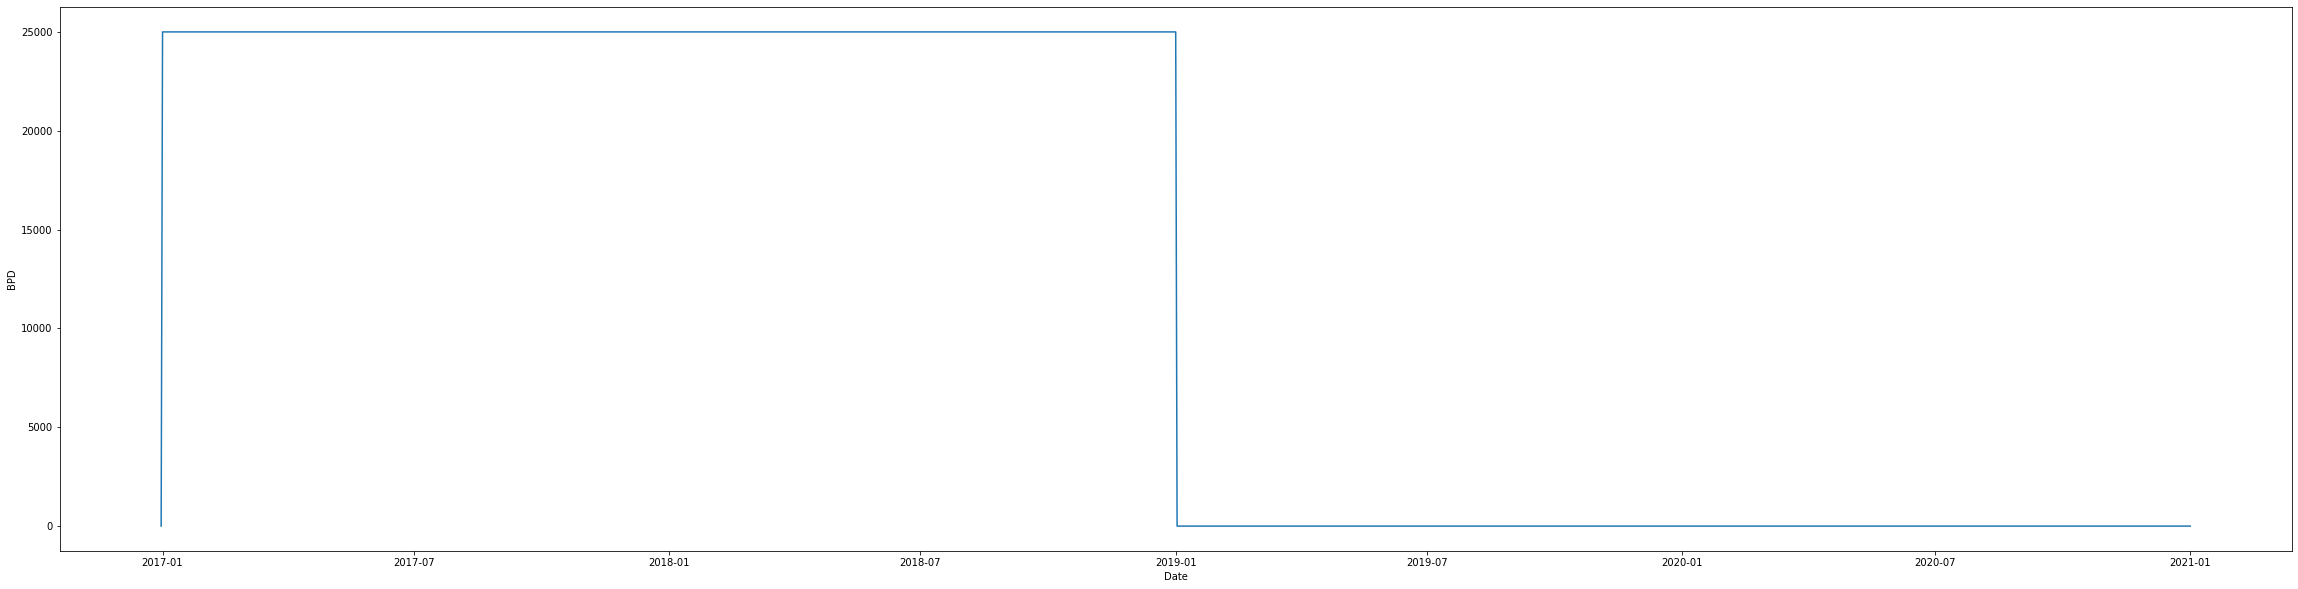

In [0]:
# Plot injection time series
f, ax = plt.subplots(1, 1,figsize=(40,10))
sns.lineplot(data=injDF,x='Date',y='BPD')

Int64Index([366, 731, 1096, 1462], dtype='int64')
366
731
1096
1462


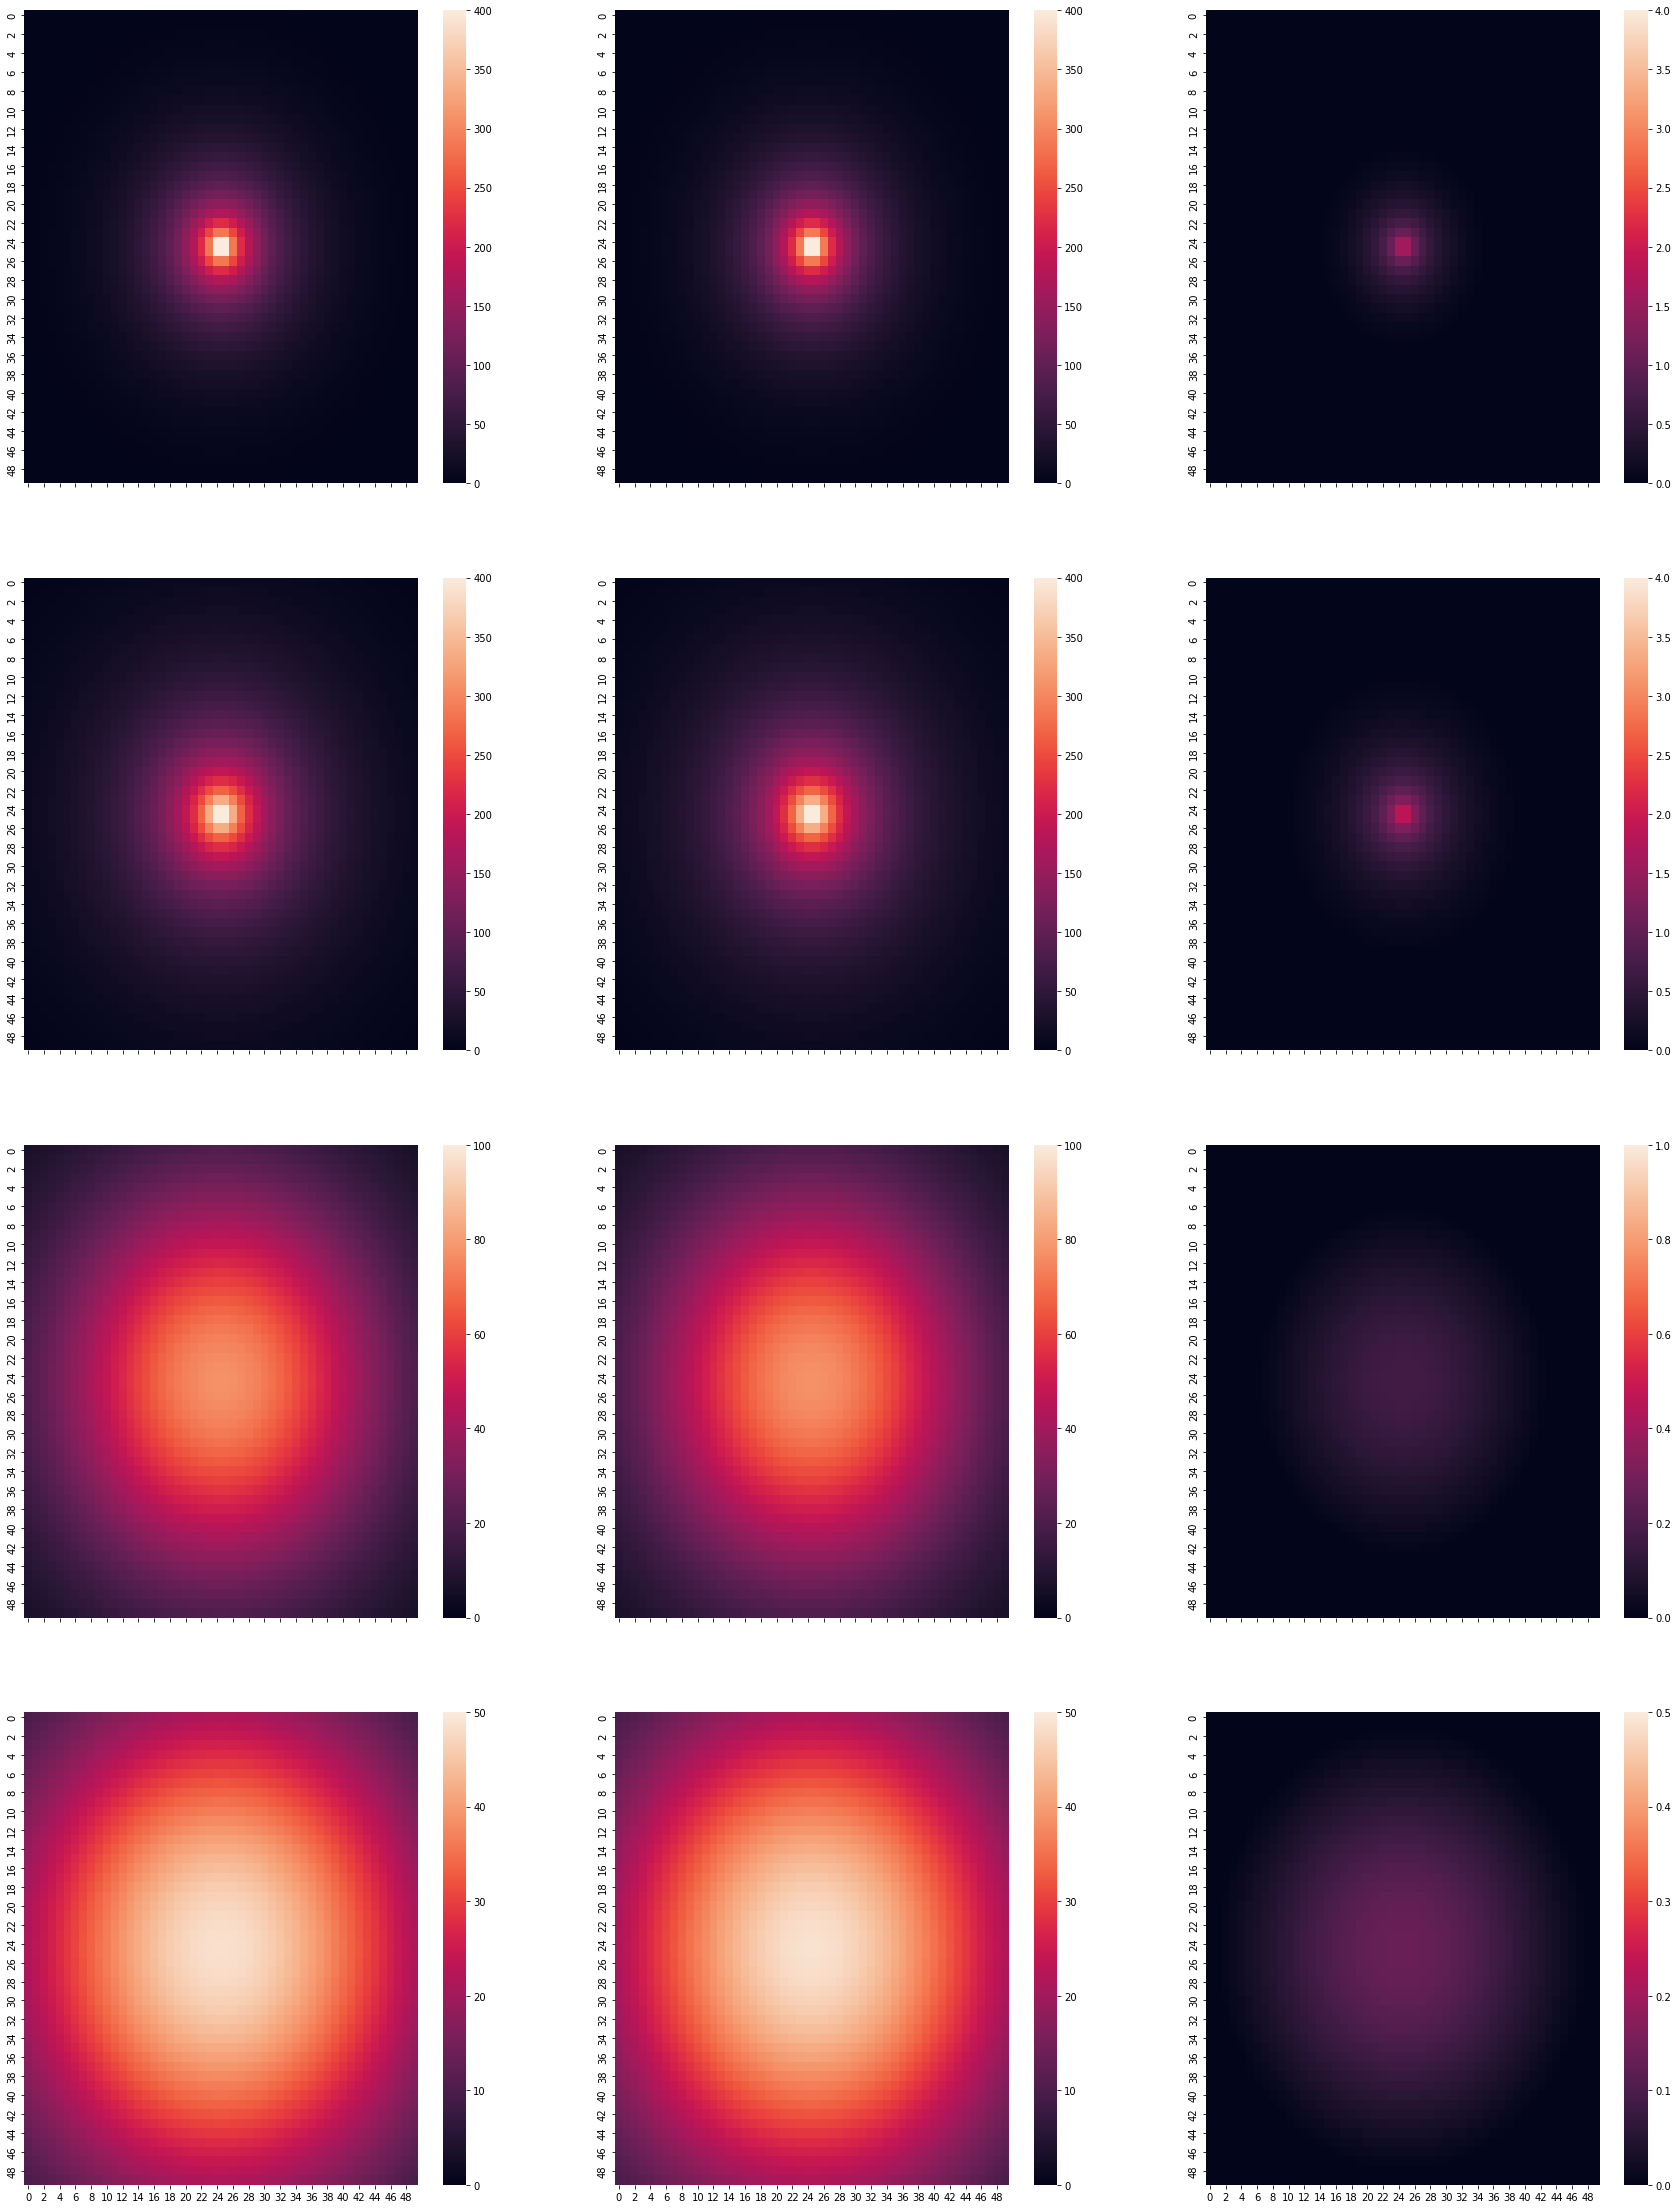

In [0]:
# Compare Matlab to computed
f, axarr = plt.subplots(4, 3,sharex=True,figsize=(30,40))
# Get plots out at a four intervals, Jan 1 per year
outIdx=outDayVec-min(dayVec)
print(outIdx)
diffNP=np.zeros([pressureGrid.shape[0],pressureGrid.shape[1],len(outIdx)])
# set color ranges
vmap=[400,400,100,50]
vdiffmap=[4,4,1,0.5]
for i in range(len(outIdx)):
  print(outIdx[i])
  sns.heatmap(pressureGrid[:,:,0,0,outIdx[i]],ax=axarr[i,0],vmin=0.,vmax=vmap[i])
  sns.heatmap(refMatlabNP[:,:,i],ax=axarr[i,1],vmin=0.,vmax=vmap[i])
  diffNP[:,:,i]=refMatlabNP[:,:,i]-pressureGrid[:,:,0,0,outIdx[i]]
  sns.heatmap(diffNP[:,:,i],ax=axarr[i,2],vmin=0.,vmax=vdiffmap[i])

#Create differences


In [0]:
print(wellDF)
eq1={'SeismicEventId': 1,
    'EventID': 'test000',
    'Origin Date': pd.to_datetime('1/1/2021').date(),
    'Latitude': 0.07200007,
    'Longitude': 0.07200007,
    'DepthKm': 3.,
    'DepthErrorKm': 0.1,
    'Magnitude': 1.,
    'MagnitudeError': 1.,
    'LatitudeErrorKm': 1.,
    'LongitudeErrorKm': 1.}
eq2={'SeismicEventId': 2,
    'EventID': 'test002',
    'Origin Date': pd.to_datetime('1/1/2021').date(),
    'Latitude': 0.0020000,
    'Longitude': 0.0020000,
    'DepthKm': 3.,
    'DepthErrorKm': 0.1,
    'Magnitude': 1.,
    'MagnitudeError': 1.,
    'LatitudeErrorKm': 1.,
    'LongitudeErrorKm': 1.}
print(eq1,eq2)

   ID    APINumber  InjectionWellId  SurfaceHoleLatitude  \
0   1  43-000-0000                1                  0.0   

   SurfaceHoleLongitude   DXs   DYs  Distances WellName Operator  
0                   0.0  10.0  10.0        0.0     Test   TestCo  
{'SeismicEventId': 1, 'EventID': 'test000', 'Origin Date': datetime.date(2021, 1, 1), 'Latitude': 0.07200007, 'Longitude': 0.07200007, 'DepthKm': 3.0, 'DepthErrorKm': 0.1, 'Magnitude': 1.0, 'MagnitudeError': 1.0, 'LatitudeErrorKm': 1.0, 'LongitudeErrorKm': 1.0} {'SeismicEventId': 2, 'EventID': 'test002', 'Origin Date': datetime.date(2021, 1, 1), 'Latitude': 0.002, 'Longitude': 0.002, 'DepthKm': 3.0, 'DepthErrorKm': 0.1, 'Magnitude': 1.0, 'MagnitudeError': 1.0, 'LatitudeErrorKm': 1.0, 'LongitudeErrorKm': 1.0}


In [0]:
# Next generate a pressure time series at one point on the grid above and run using runPressureScenarios. Compare time series to result from runPressureGrid which we should be happy with
# Update wellDF with distance to earthquake - 
gistTest.injDT=1.
wellDF['Distances']=np.sqrt(128.)
scenarios1,dP1 = gistTest.runPressureScenariosFast(eq1,wellDF,injDF,verbose=0)
wellDF['Distances']=np.sqrt(2.12244898*2.12244898*2.)
scenarios2,dP2 = gistTest.runPressureScenariosFast(eq2,wellDF,injDF,verbose=0)

r2:  128000000.00000001 128000000.00000001
TSOver4TT:  1.1215902036569363 1.1217366472688703
ppp:  143563546.06808788 143582290.8504154
durations:  86400.0 126489658.97610927
epp:  0.0 0.17574893772185432
pressureScenariosToDF:  1 5 5 5
pressureScenariosToDF:  5 5
r2:  9009579.345406082 9009579.345406082
TSOver4TT:  1.1215902036569363 1.1217366472688703
ppp:  10105055.932877334 10106375.328218682
durations:  86400.0 126489658.97610927
epp:  1.3427196742793097e-53 2.0282297701235925
pressureScenariosToDF:  1 5 5 5
pressureScenariosToDF:  5 5


In [0]:
print(dP1.shape)
dP1v=dP1.transpose((2,1,0))
dP2v=dP2.transpose((2,1,0))
dPv=np.concatenate((dP1v,dP2v),axis=2)


(1, 5, 1465)


In [0]:
# Get snapshots from FSP modeling
print(refMatlabNP.shape)
print(xy[0,:])
matlab1=refMatlabNP[49,49,:].flatten()
matlab2=refMatlabNP[18,18,:].flatten()
print(outDayVec)


(50, 50, 4)
[[ 2.          2.        ]
 [ 2.32653061  2.        ]
 [ 2.65306122  2.        ]
 [ 2.97959184  2.        ]
 [ 3.30612245  2.        ]
 [ 3.63265306  2.        ]
 [ 3.95918367  2.        ]
 [ 4.28571429  2.        ]
 [ 4.6122449   2.        ]
 [ 4.93877551  2.        ]
 [ 5.26530612  2.        ]
 [ 5.59183673  2.        ]
 [ 5.91836735  2.        ]
 [ 6.24489796  2.        ]
 [ 6.57142857  2.        ]
 [ 6.89795918  2.        ]
 [ 7.2244898   2.        ]
 [ 7.55102041  2.        ]
 [ 7.87755102  2.        ]
 [ 8.20408163  2.        ]
 [ 8.53061224  2.        ]
 [ 8.85714286  2.        ]
 [ 9.18367347  2.        ]
 [ 9.51020408  2.        ]
 [ 9.83673469  2.        ]
 [10.16326531  2.        ]
 [10.48979592  2.        ]
 [10.81632653  2.        ]
 [11.14285714  2.        ]
 [11.46938776  2.        ]
 [11.79591837  2.        ]
 [12.12244898  2.        ]
 [12.44897959  2.        ]
 [12.7755102   2.        ]
 [13.10204082  2.        ]
 [13.42857143  2.        ]
 [13.75510204  2

Out[28]: Text(0.5, 1.0, 'Point 2.122km N and 2.122km E of injector')

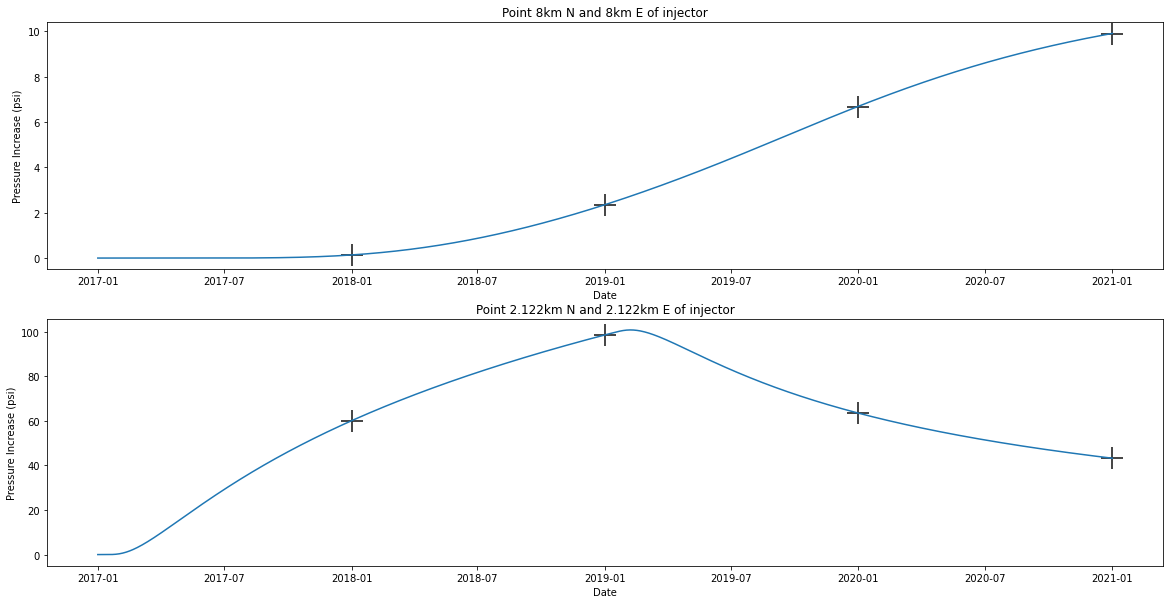

In [0]:
f, ax = plt.subplots(2, 1,figsize=(20,10))
sns.lineplot(x=dateVec,y=dPv[1:1464,0,0],ax=ax[0])
sns.scatterplot(x=outDateVec,y=matlab1,ax=ax[0], s=500, color=".2", marker="+")
sns.lineplot(x=dateVec,y=dPv[1:1464,0,1],ax=ax[1])
sns.scatterplot(x=outDateVec,y=matlab2,ax=ax[1], s=500, color=".2", marker="+")
ax[0].set_ylabel('Pressure Increase (psi)')
ax[0].set_xlabel('Date')
ax[0].set_title('Point 8km N and 8km E of injector')
ax[1].set_ylabel('Pressure Increase (psi)')
ax[1].set_xlabel('Date')
ax[1].set_title('Point 2.122km N and 2.122km E of injector')

# Load anisotropic reference

# Run anistropic modeling

# Compare anisotropic results